In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xticks
%matplotlib inline

In [2]:
data = pd.read_csv('Leads.csv')

In [3]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
sum(data.duplicated(subset = 'Prospect ID')) == 0

True

In [5]:
data.shape

(9240, 37)

In [6]:
data = data.replace('Select', np.nan)

In [7]:
data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [9]:
data = data.drop(data.loc[:,list(round(100*(data.isnull().sum()/len(data.index)), 2)>70)].columns, 1)

In [11]:
data['Lead Quality'] = data['Lead Quality'].replace(np.nan, 'Not Sure')

<AxesSubplot:xlabel='Lead Quality', ylabel='count'>

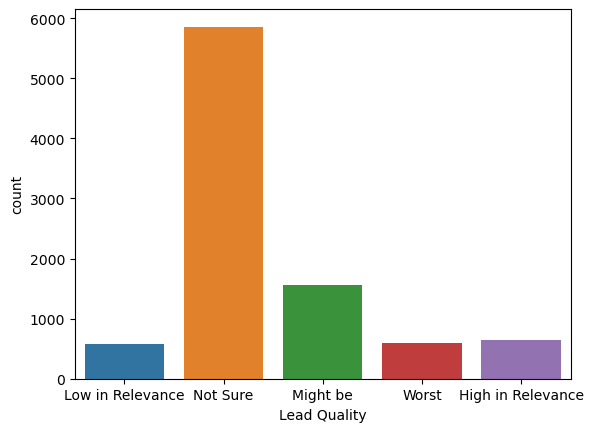

In [12]:
sns.countplot(data['Lead Quality'])

In [13]:
data = data.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'],1)

In [14]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

<AxesSubplot:xlabel='City', ylabel='count'>

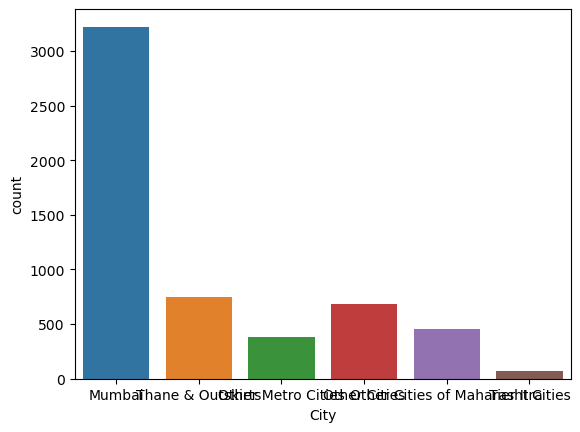

In [15]:
sns.countplot(data.City)

In [16]:
data['City'] = data['City'].replace(np.nan, 'Mumbai')

In [17]:
data['Specialization'] = data['Specialization'].replace(np.nan, 'Others')

In [18]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

<AxesSubplot:xlabel='Tags', ylabel='count'>

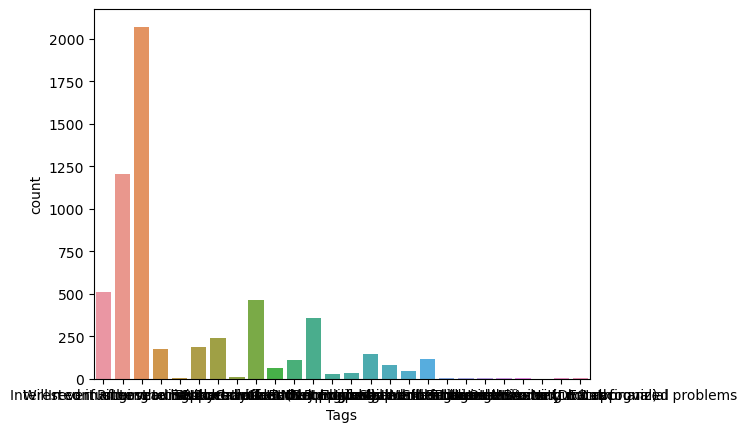

In [19]:
sns.countplot(data.Tags)

In [20]:
data['Tags'] = data['Tags'].replace(np.nan, 'Will revert after reading the email')

In [21]:
data['What matters most to you in choosing a course'] = data['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

In [22]:
data['What is your current occupation'] = data['What is your current occupation'].replace(np.nan, 'Unemployed')

In [23]:
data['Country'] = data['Country'].replace(np.nan, 'India')

In [24]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [25]:
data.dropna(inplace = True)

In [26]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [27]:
data.to_csv('Leads_cleaned')

In [ ]:
## EDA

In [28]:
Converted = (sum(data['Converted'])/len(data['Converted'].index))*100
Converted

37.85541106458012

<AxesSubplot:xlabel='Lead Origin', ylabel='count'>

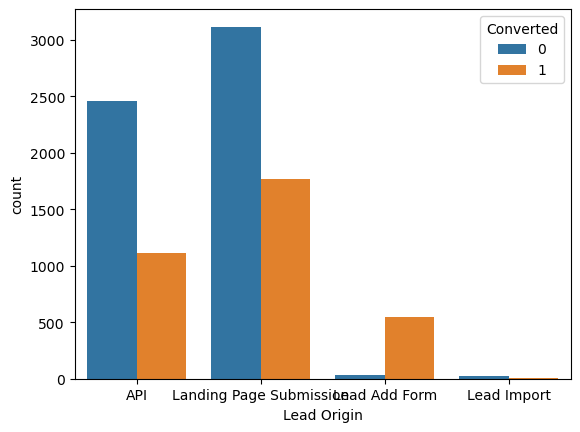

In [29]:
sns.countplot(x = "Lead Origin", hue = "Converted", data = data)


<AxesSubplot:xlabel='Lead Source', ylabel='count'>

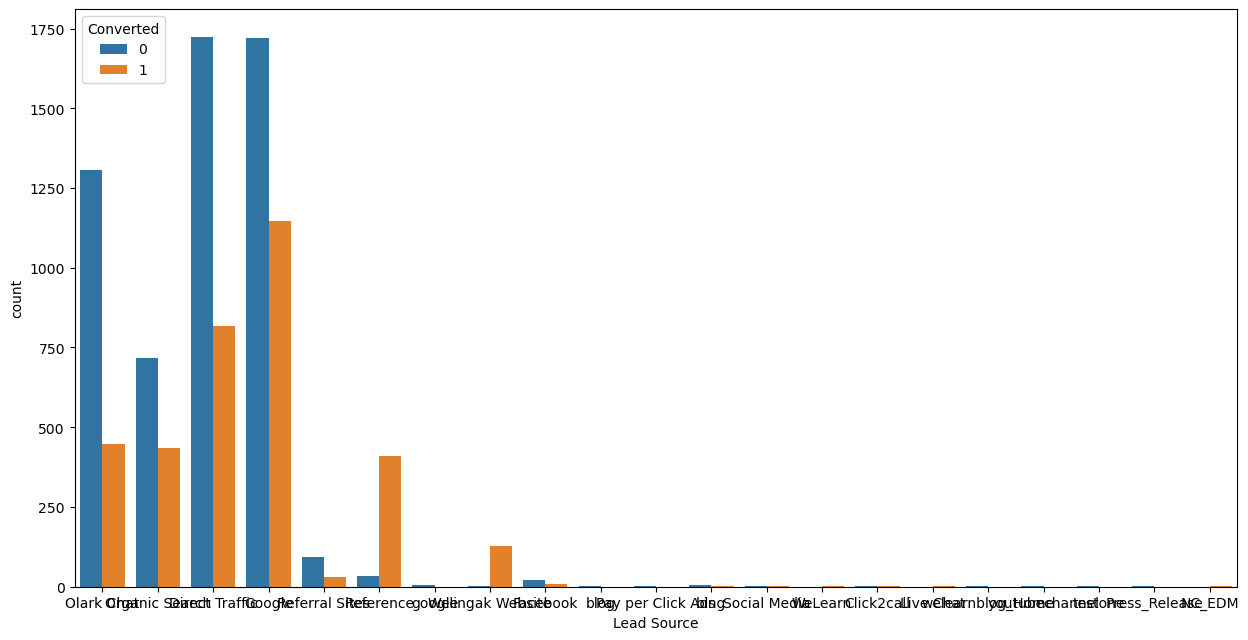

In [30]:
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(x = "Lead Source", hue = "Converted", data = data)

In [31]:
data['Lead Source'] = data['Lead Source'].replace(['google'], 'Google')
data['Lead Source'] = data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

<AxesSubplot:xlabel='Lead Source', ylabel='count'>

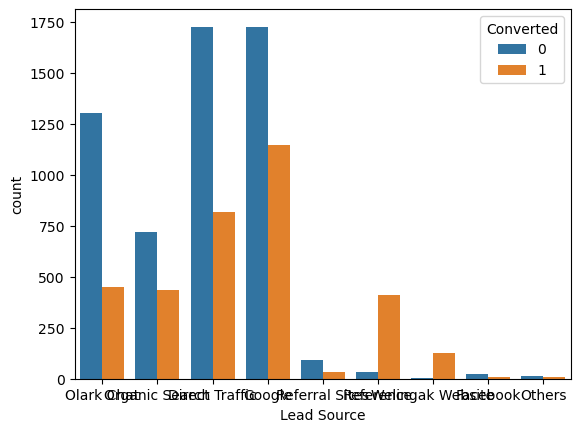

In [32]:
sns.countplot(x = "Lead Source", hue = "Converted", data = data)

In [33]:
data['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

<AxesSubplot:xlabel='TotalVisits'>

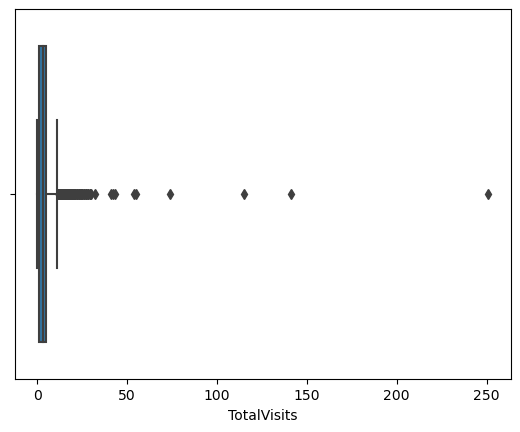

In [34]:
sns.boxplot(data['TotalVisits'])

In [35]:
percentiles = data['TotalVisits'].quantile([0.05,0.95]).values
data['TotalVisits'][data['TotalVisits'] <= percentiles[0]] = percentiles[0]
data['TotalVisits'][data['TotalVisits'] >= percentiles[1]] = percentiles[1]

<AxesSubplot:xlabel='TotalVisits'>

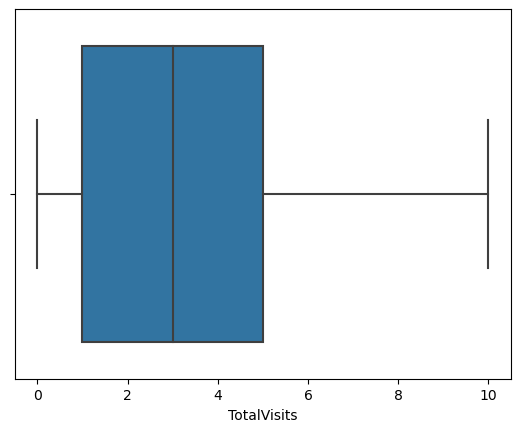

In [36]:
sns.boxplot(data['TotalVisits'])

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

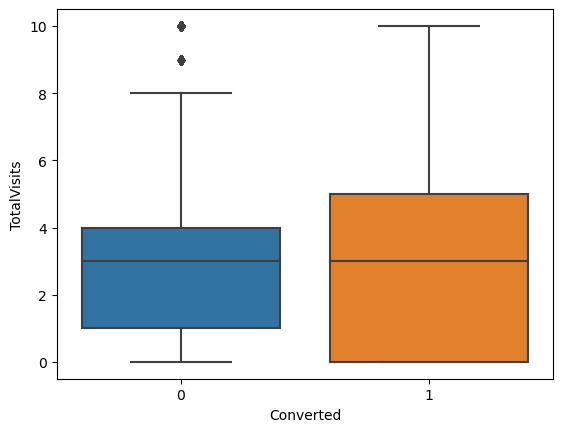

In [37]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = data)

In [38]:
data['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

<AxesSubplot:xlabel='Total Time Spent on Website'>

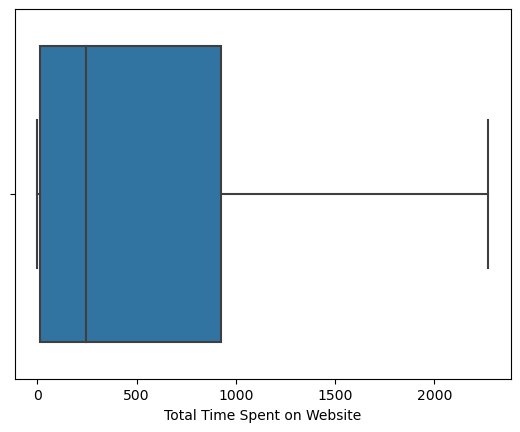

In [39]:
sns.boxplot(data['Total Time Spent on Website'])

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

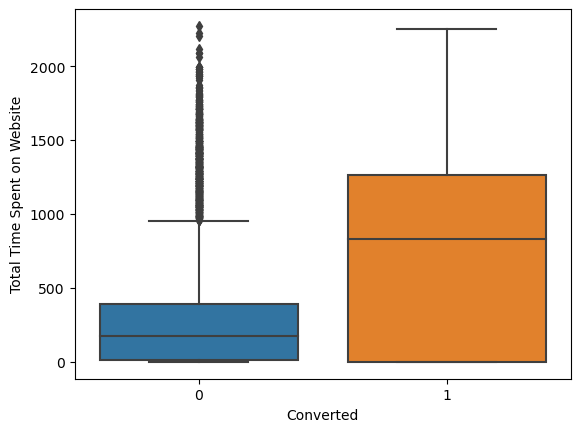

In [40]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = data)

In [41]:
data['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

<AxesSubplot:xlabel='Page Views Per Visit'>

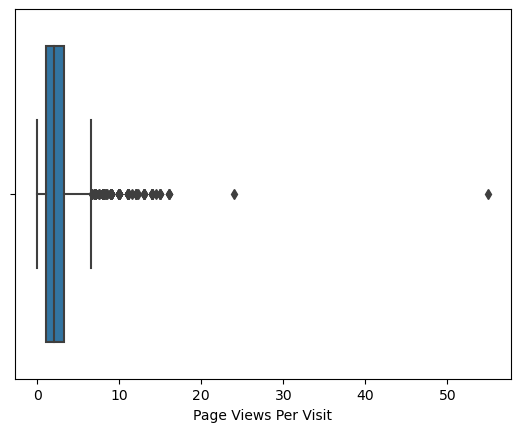

In [42]:
sns.boxplot(data['Page Views Per Visit'])

In [43]:
percentiles = data['Page Views Per Visit'].quantile([0.05,0.95]).values
data['Page Views Per Visit'][data['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
data['Page Views Per Visit'][data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

<AxesSubplot:xlabel='Page Views Per Visit'>

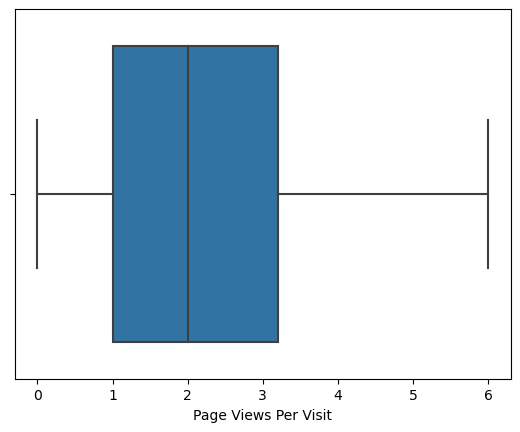

In [44]:
sns.boxplot(data['Page Views Per Visit'])

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

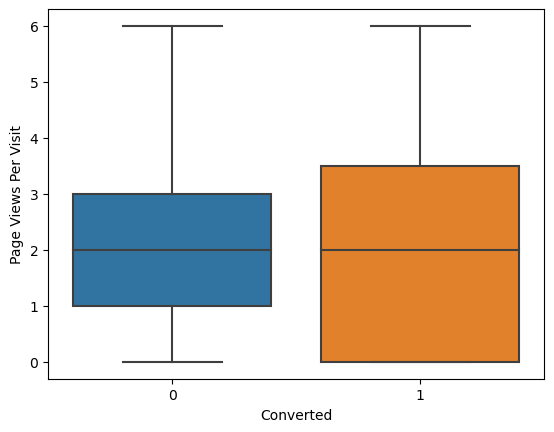

In [45]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = data)

In [46]:
data['Last Activity'].describe()

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

<AxesSubplot:xlabel='Last Activity', ylabel='count'>

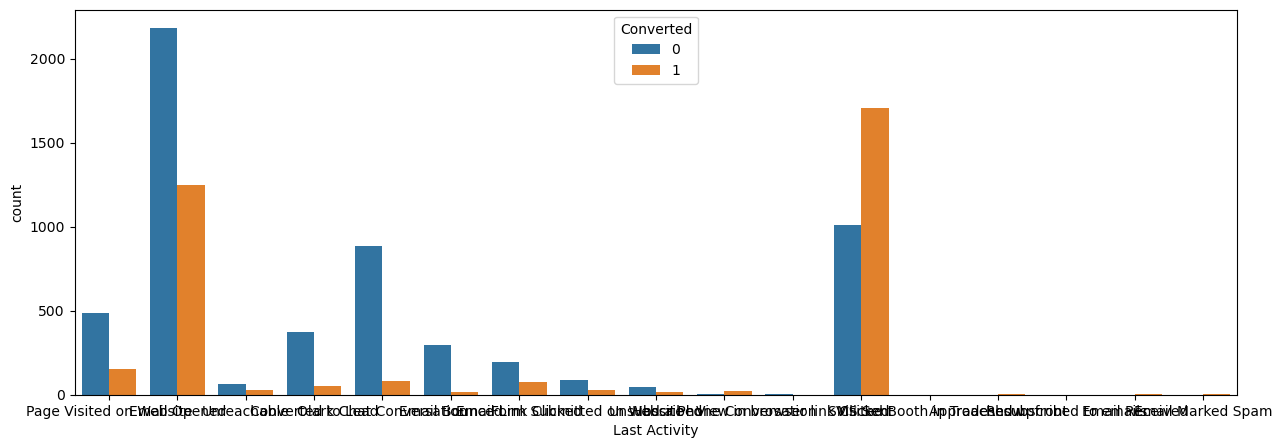

In [47]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = data)

In [48]:
data['Last Activity'] = data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

<AxesSubplot:xlabel='Last Activity', ylabel='count'>

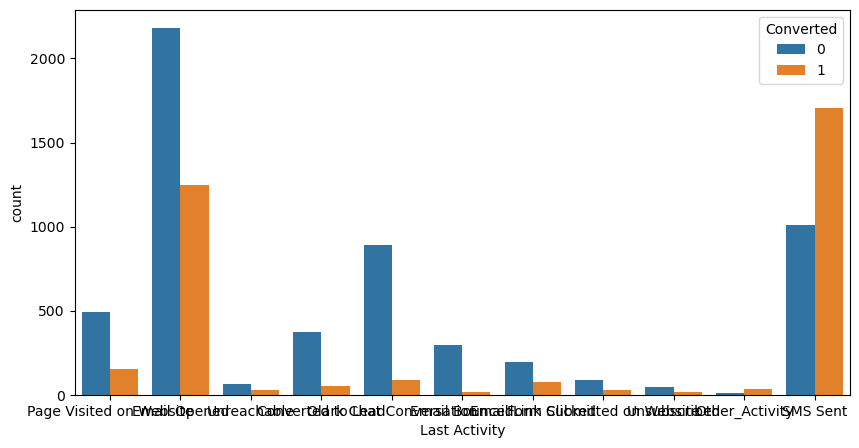

In [49]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = data)

In [50]:
data.Country.describe()

count      9074
unique       38
top       India
freq       8787
Name: Country, dtype: object

In [51]:
data.Specialization.describe()

count       9074
unique        19
top       Others
freq        3282
Name: Specialization, dtype: object

In [52]:
data['Specialization'] = data['Specialization'].replace(['Others'], 'Other_Specialization')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Other_Specialization'),
  Text(1, 0, 'Business Administration'),
  Text(2, 0, 'Media and Advertising'),
  Text(3, 0, 'Supply Chain Management'),
  Text(4, 0, 'IT Projects Management'),
  Text(5, 0, 'Finance Management'),
  Text(6, 0, 'Travel and Tourism'),
  Text(7, 0, 'Human Resource Management'),
  Text(8, 0, 'Marketing Management'),
  Text(9, 0, 'Banking, Investment And Insurance'),
  Text(10, 0, 'International Business'),
  Text(11, 0, 'E-COMMERCE'),
  Text(12, 0, 'Operations Management'),
  Text(13, 0, 'Retail Management'),
  Text(14, 0, 'Services Excellence'),
  Text(15, 0, 'Hospitality Management'),
  Text(16, 0, 'Rural and Agribusiness'),
  Text(17, 0, 'Healthcare Management'),
  Text(18, 0, 'E-Business')])

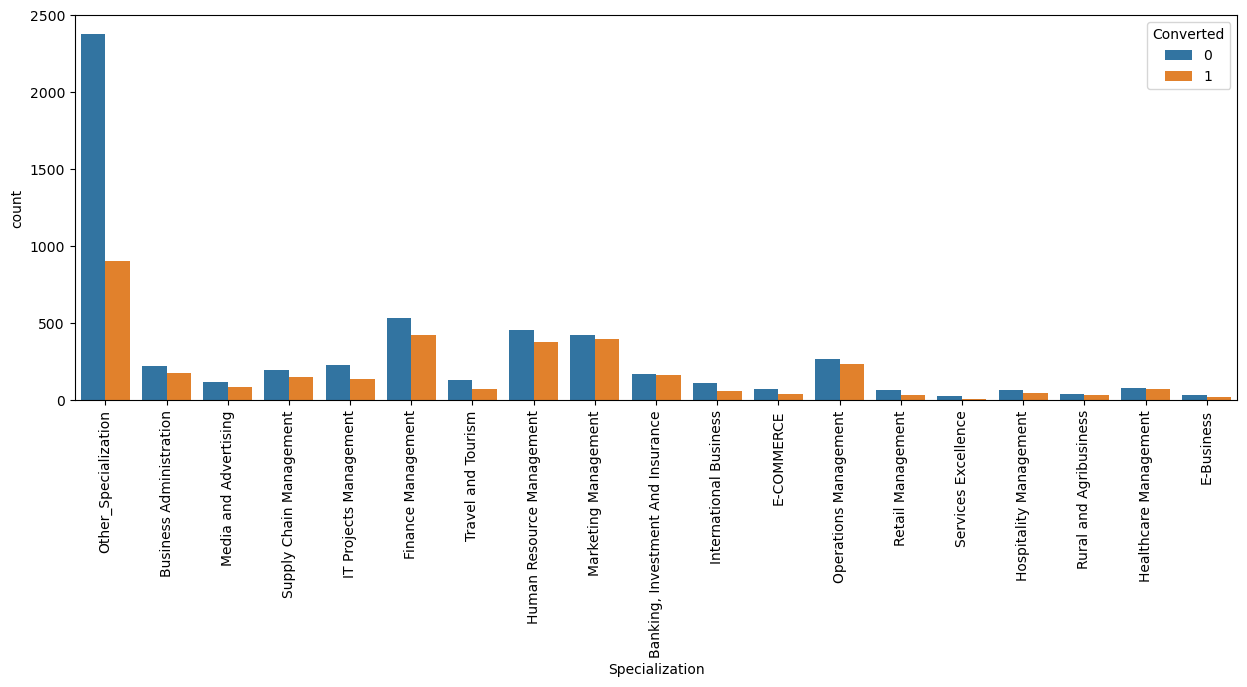

In [54]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Specialization", hue = "Converted", data = data)
xticks(rotation = 90)

In [55]:
data['What is your current occupation'].describe()

count           9074
unique             6
top       Unemployed
freq            8159
Name: What is your current occupation, dtype: object

In [56]:
data['What is your current occupation'] = data['What is your current occupation'].replace(['Other'], 'Other_Occupation')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other_Occupation'),
  Text(5, 0, 'Housewife')])

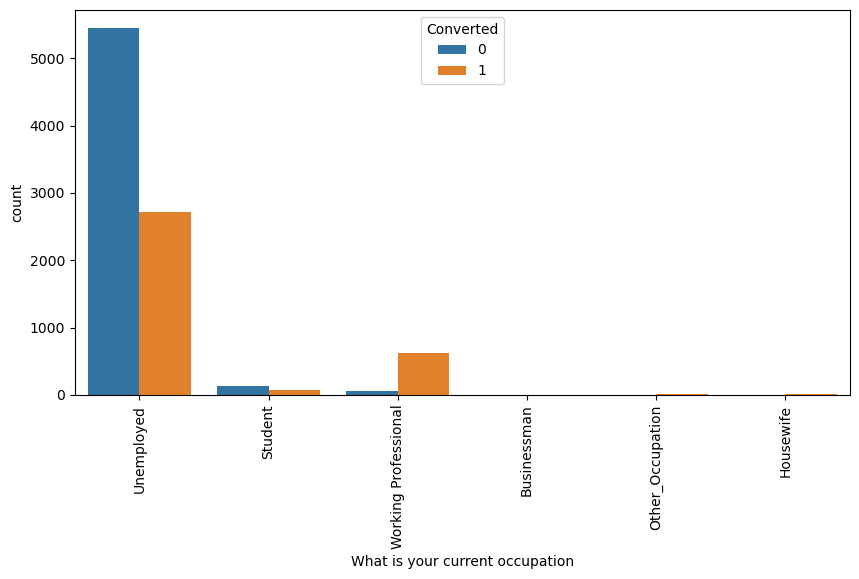

In [57]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = data)
xticks(rotation = 90)

In [58]:
data['What matters most to you in choosing a course'].describe()

count                        9074
unique                          3
top       Better Career Prospects
freq                         9072
Name: What matters most to you in choosing a course, dtype: object

In [59]:
data.Search.describe()

count     9074
unique       2
top         No
freq      9060
Name: Search, dtype: object

In [60]:
data.Magazine.describe()

count     9074
unique       1
top         No
freq      9074
Name: Magazine, dtype: object

In [61]:
data['Newspaper Article'].describe()

count     9074
unique       2
top         No
freq      9072
Name: Newspaper Article, dtype: object

In [62]:
data['X Education Forums'].describe()

count     9074
unique       2
top         No
freq      9073
Name: X Education Forums, dtype: object

In [63]:
data['Newspaper'].describe()

count     9074
unique       2
top         No
freq      9073
Name: Newspaper, dtype: object

In [64]:
data['Digital Advertisement'].describe()

count     9074
unique       2
top         No
freq      9070
Name: Digital Advertisement, dtype: object

In [65]:
data['Through Recommendations'].describe()

count     9074
unique       2
top         No
freq      9067
Name: Through Recommendations, dtype: object

In [66]:
data['Receive More Updates About Our Courses'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Receive More Updates About Our Courses, dtype: object

In [67]:
data['Tags'].describe()

count                                    9074
unique                                     26
top       Will revert after reading the email
freq                                     5343
Name: Tags, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'number not provided'),
  Text(12, 0, 'opp hangup'),
  Text(13, 0, 'Closed by Horizzon'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0, 'Interested in Next batc

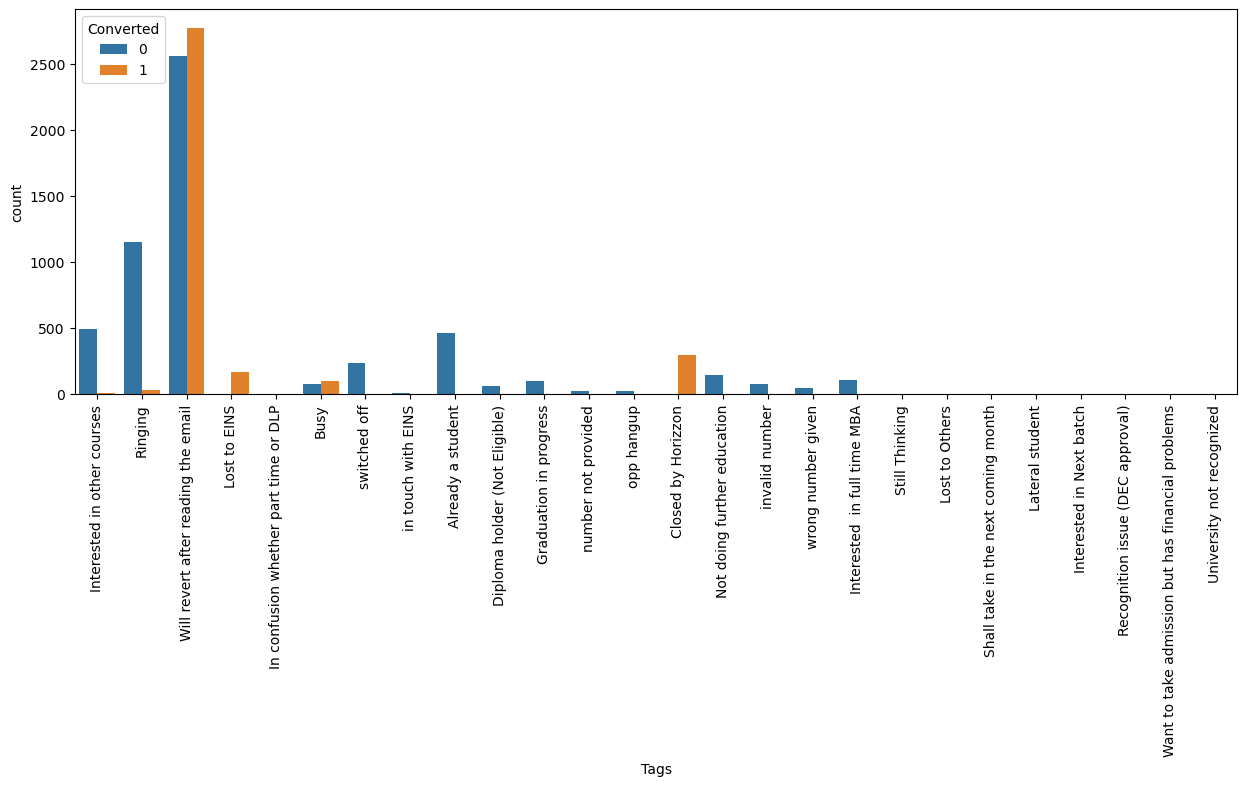

In [68]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Tags", hue = "Converted", data = data)
xticks(rotation = 90)

In [69]:
data['Tags'] = data['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'Other_Tags'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'Already a student'),
  Text(8, 0, 'Closed by Horizzon'),
  Text(9, 0, 'Not doing further education'),
  Text(10, 0, 'invalid number'),
  Text(11, 0, 'wrong number given'),
  Text(12, 0, 'Interested  in full time MBA')])

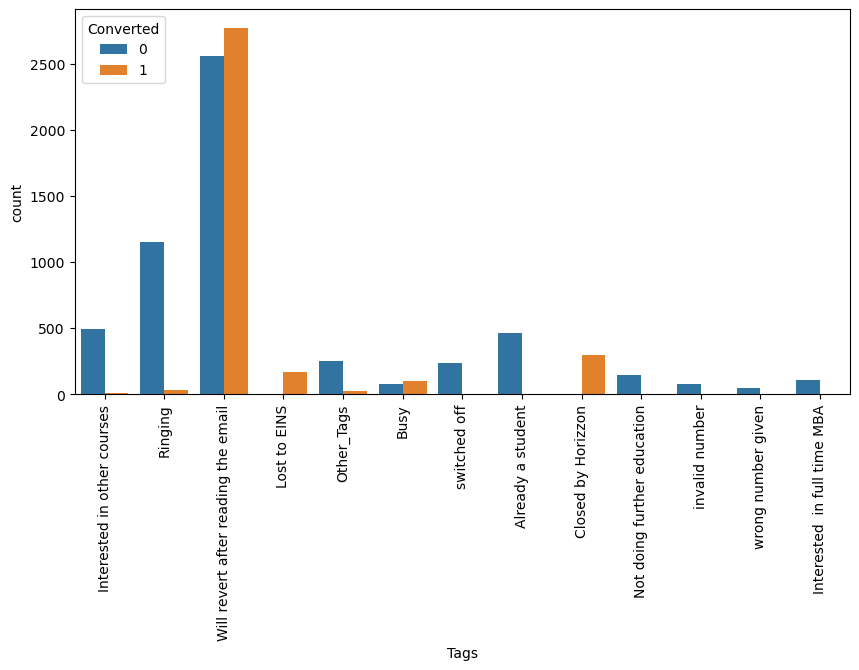

In [70]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Tags", hue = "Converted", data = data)
xticks(rotation = 90)

In [71]:
data['Lead Quality'].describe()

count         9074
unique           5
top       Not Sure
freq          5806
Name: Lead Quality, dtype: object

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Low in Relevance'),
  Text(1, 0, 'Not Sure'),
  Text(2, 0, 'Might be'),
  Text(3, 0, 'Worst'),
  Text(4, 0, 'High in Relevance')])

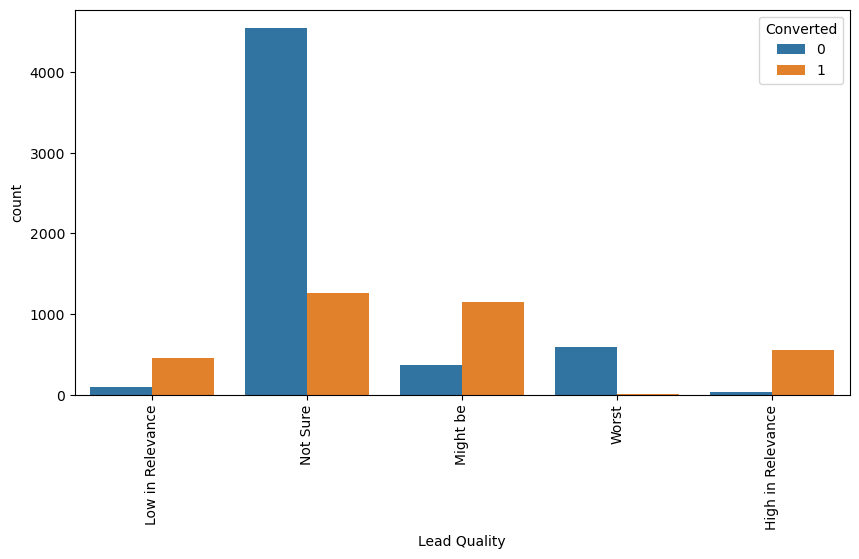

In [72]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Lead Quality", hue = "Converted", data = data)
xticks(rotation = 90)

In [73]:
data['Update me on Supply Chain Content'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Update me on Supply Chain Content, dtype: object

In [74]:
data['Get updates on DM Content'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Get updates on DM Content, dtype: object

In [75]:
data['I agree to pay the amount through cheque'].describe()

count     9074
unique       1
top         No
freq      9074
Name: I agree to pay the amount through cheque, dtype: object

In [76]:
data['A free copy of Mastering The Interview'].describe()

count     9074
unique       2
top         No
freq      6186
Name: A free copy of Mastering The Interview, dtype: object

In [77]:
data['City'].describe()

count       9074
unique         6
top       Mumbai
freq        6752
Name: City, dtype: object

<AxesSubplot:xlabel='City', ylabel='count'>

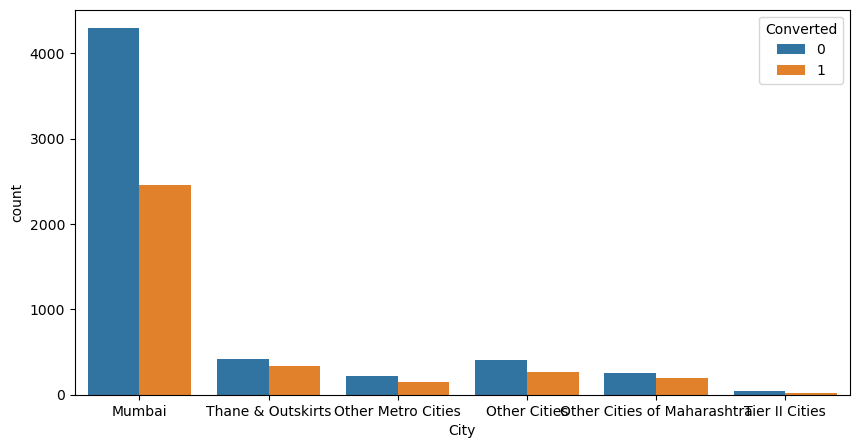

In [78]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "City", hue = "Converted", data = data)

In [79]:
data['Last Notable Activity'].describe()

count         9074
unique          16
top       Modified
freq          3267
Name: Last Notable Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Modified'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Page Visited on Website'),
  Text(3, 0, 'Email Bounced'),
  Text(4, 0, 'Email Link Clicked'),
  Text(5, 0, 'Unreachable'),
  Text(6, 0, 'Unsubscribed'),
  Text(7, 0, 'Had a Phone Conversation'),
  Text(8, 0, 'Olark Chat Conversation'),
  Text(9, 0, 'SMS Sent'),
  Text(10, 0, 'Approached upfront'),
  Text(11, 0, 'Resubscribed to emails'),
  Text(12, 0, 'View in browser link Clicked'),
  Text(13, 0, 'Form Submitted on Website'),
  Text(14, 0, 'Email Received'),
  Text(15, 0, 'Email Marked Spam')])

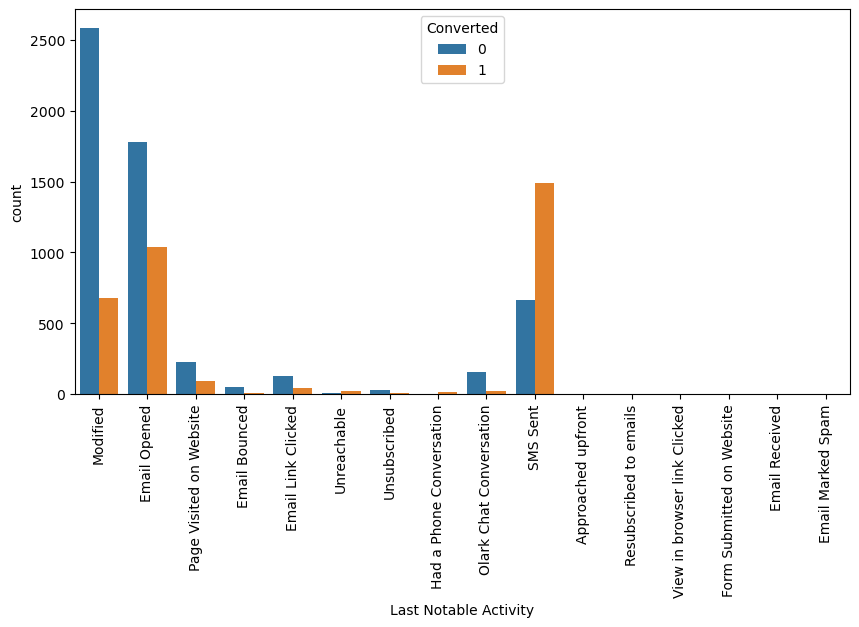

In [80]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = data)
xticks(rotation = 90)

In [81]:
data = data.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country'],1)

In [ ]:
## Data Prep

In [82]:
varlist =  ['Do Not Email', 'Do Not Call']
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

data[varlist] = data[varlist].apply(binary_map)

In [83]:
dummy1 = pd.get_dummies(data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity']], drop_first=True)
dummy1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [84]:
data = pd.concat([data, dummy1], axis=1)
data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


In [86]:
data = data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Tags','Lead Quality','City','Last Notable Activity'], axis = 1)

In [87]:
data.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [88]:
from sklearn.model_selection import train_test_split
X = data.drop(['Prospect ID','Converted'], axis=1)

In [89]:
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [90]:
y = data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [92]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [93]:
Converted = (sum(data['Converted'])/len(data['Converted'].index))*100
Converted

37.85541106458012

In [ ]:
## model building

In [94]:
import statsmodels.api as sm

In [99]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6265
Model Family:                Binomial   Df Model:                           85
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 19 Nov 2024   Deviance:                       71012.
Time:                        22:47:39   Pearson chi2:                 3.47e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 1.325e+15   7.53e+07   1.76e+07      0.000    1.32e+15    1.32e+15
Do Not Email                                         -2.346e+14   4.45e+06  -5.27e+07      0.000   -2.35e+14   -2.35e+14
Do Not Call                                           2.238e+16   4.78e+07   4.68e+08      0.000    2.24e+16    2.24e+16
TotalVisits                                           1.001e+13   1.44e+06   6.94e+06      0.000       1e+13       1e+13
Total Time Spent on Website                           1.836e+14   1.02e+06   1.79e+08      0.000    1.84e+14    1.84e+14
Page Views Per Visit                                 -5.822e+13   1.58e+06  -3.68e+07      0.000   -5.82e+13   -5.82e+13
Lead Origin_Landing Page Submission                  -4.063e+13   1.69e+06   -2.4e+07      0.000   -4.06e+13   -4.06e+13
Lead Origin_Lead Add Form                              3.84e+14   1.43e+07   2.68e+07      0.000    3.84e+14    3.84e+14
Lead Origin_Lead Import                                 1.5e+15   3.47e+07   4.33e+07      0.000     1.5e+15     1.5e+15
Lead Source_Facebook                                 -1.475e+15   3.39e+07  -4.34e+07      0.000   -1.47e+15   -1.47e+15
Lead Source_Google                                    3.762e+12   1.23e+06   3.07e+06      0.000    3.76e+12    3.76e+12
Lead Source_Olark Chat                               -3.487e+13   1.97e+06  -1.77e+07      0.000   -3.49e+13   -3.49e+13
Lead Source_Organic Search                            4.159e+13   1.61e+06   2.58e+07      0.000    4.16e+13    4.16e+13
Lead Source_Others                                   -2.615e+14   9.25e+06  -2.83e+07      0.000   -2.61e+14   -2.61e+14
Lead Source_Reference                                -2.942e+14   1.45e+07  -2.03e+07      0.000   -2.94e+14   -2.94e+14
Lead Source_Referral Sites                            7.774e+13   3.92e+06   1.98e+07      0.000    7.77e+13    7.77e+13
Lead Source_Welingak Website                          6.045e+14   1.48e+07    4.1e+07      0.000    6.05e+14    6.05e+14
Last Activity_Email Bounced                           4.834e+13   3.89e+06   1.24e+07      0.000    4.83e+13    4.83e+13
Last Activity_Email Link Clicked                     -1.366e+14   4.77e+06  -2.86e+07      0.000   -1.37e+14   -1.37e+14
Last Activity_Email Opened                            2.495e+13   2.67e+06   9.35e+06      0.000    2.49e+13    2.49e+13
Last Activity_Form Submitted on Website              -4.381e+12   4.46e+06  -9.83e+05      0.000   -4.38e+12   -4.38e+12
Last Activity_Olark Chat Conversation                 2.902e+14   2.65e+06    1.1e+08      0.000     2.9e+14     2.9e+14
Last Activity_Other_Activity                          1.80

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

logreg = LogisticRegression(max_iter=1000, random_state=42)

rfe = RFE(estimator=logreg, n_features_to_select=15) 
rfe = rfe.fit(X_train, y_train)

selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['Lead Source_Welingak Website', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Will revert after reading the email',
       'Tags_switched off', 'Last Notable Activity_SMS Sent',
       'Lead Source_Welingak Website', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Lead Quality_Not Sure',
       'Lead Quality_Worst'],
      dtype='object')


In [102]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False,  True,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [103]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 6),
 ('Do Not Call', False, 64),
 ('TotalVisits', False, 84),
 ('Total Time Spent on Website', False, 14),
 ('Page Views Per Visit', False, 77),
 ('Lead Origin_Landing Page Submission', False, 28),
 ('Lead Origin_Lead Add Form', False, 12),
 ('Lead Origin_Lead Import', False, 13),
 ('Lead Source_Facebook', False, 63),
 ('Lead Source_Google', False, 79),
 ('Lead Source_Olark Chat', False, 16),
 ('Lead Source_Organic Search', False, 78),
 ('Lead Source_Others', False, 91),
 ('Lead Source_Reference', False, 103),
 ('Lead Source_Referral Sites', False, 111),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 74),
 ('Last Activity_Email Link Clicked', False, 73),
 ('Last Activity_Email Opened', False, 149),
 ('Last Activity_Form Submitted on Website', False, 140),
 ('Last Activity_Olark Chat Conversation', False, 25),
 ('Last Activity_Other_Activity', False, 21),
 ('Last Activity_Page Visited on Website', False, 86),
 ('Last Activity

In [104]:
col = X_train.columns[rfe.support_]
col

Index(['Lead Source_Welingak Website', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Will revert after reading the email',
       'Tags_switched off', 'Last Notable Activity_SMS Sent',
       'Lead Source_Welingak Website', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Lead Quality_Not Sure',
       'Lead Quality_Worst'],
      dtype='object')

In [105]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       ...
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=150)

In [106]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6340
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1629.2
Date:                Tue, 19 Nov 2024   Deviance:                       3258.3
Time:                        22:50:13   Pearson chi2:                 3.01e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5596
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.9494      0.209     -9.324      0.000      -2.359      -1.540
Lead Source_Welingak Website                 1.0934      0.182      6.009      0.000       0.737       1.450
Lead Source_Welingak Website                 1.0934      0.182      6.009      0.000       0.737       1.450
Tags_Busy                                    0.9753      0.083     11.781      0.000       0.813       1.138
Tags_Busy                                    0.9753      0.083     11.781      0.000       0.813       1.138
Tags_Closed by Horizzon                      2.0957      0.190     11.051      0.000       1.724       2.467
Tags_Closed by Horizzon                      2.0957      0.190     11.051      0.000       1.724       2.467
Tags_Lost to EINS                            2.3224      0.188     12.354      0.000       1.954       2.691
Tags_Lost to EINS                            2.3224      0.188     12.354      0.000       1.954       2.691
Tags_Will revert after reading the email     1.0146      0.057     17.829      0.000       0.903       1.126
Tags_Will revert after reading the email     1.0146      0.057     17.829      0.000       0.903       1.126
Tags_switched off                           -1.2835      0.291     -4.403      0.000      -1.855      -0.712
Tags_switched off                           -1.2835      0.291     -4.403      0.000      -1.855      -0.712
Last Notable Activity_SMS Sent               1.3818      0.059     23.343      0.000       1.266       1.498
Last Notable Activity_SMS Sent               1.3818      0.059     23.343      0.000       1.266       1.498
Lead Source_Welingak Website                 1.0934      0.182      6.009      0.000       0.737       1.450
Lead Source_Welingak Website                 1.0934      0.182      6.009      0.000       0.737       1.450
Tags_Busy                                    0.9753      0.083     11.781      0.000       0.813       1.138
Tags_Busy                                    0.9753      0.083     11.781      0.000       0.813       1.138
Tags_Closed by Horizzon                      2.0957      0.190     11.051      0.000       1.724       2.467
Tags_Closed by Horizzon                      2.0957      0.190     11.051      0.000       1.724       2.467
Tags_Lost to EINS                            2.3224      0.188     12.354      0.000       1.954       2.691
Tags_Lost to EINS                            2.3224      0.188     12.354      0.000       1.954       2.691
Tags_Ringing                                -0.9100      0.167     -5.435      0.000      -1.238      -0.582
Tags_Ringing                                -0.9100      0.167     -5.435      0.000      -1.238      -0.582
Tags_Will revert after reading 

In [109]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6340
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1629.2
Date:                Tue, 19 Nov 2024   Deviance:                       3258.3
Time:                        22:50:57   Pearson chi2:                 3.01e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5596
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.9494      0.209     -9.324      0.000      -2.359      -1.540
Lead Source_Welingak Website                 1.0934      0.182      6.009      0.000       0.737       1.450
Lead Source_Welingak Website                 1.0934      0.182      6.009      0.000       0.737       1.450
Tags_Busy                                    0.9753      0.083     11.781      0.000       0.813       1.138
Tags_Busy                                    0.9753      0.083     11.781      0.000       0.813       1.138
Tags_Closed by Horizzon                      2.0957      0.190     11.051      0.000       1.724       2.467
Tags_Closed by Horizzon                      2.0957      0.190     11.051      0.000       1.724       2.467
Tags_Lost to EINS                            2.3224      0.188     12.354      0.000       1.954       2.691
Tags_Lost to EINS                            2.3224      0.188     12.354      0.000       1.954       2.691
Tags_Will revert after reading the email     1.0146      0.057     17.829      0.000       0.903       1.126
Tags_Will revert after reading the email     1.0146      0.057     17.829      0.000       0.903       1.126
Tags_switched off                           -1.2835      0.291     -4.403      0.000      -1.855      -0.712
Tags_switched off                           -1.2835      0.291     -4.403      0.000      -1.855      -0.712
Last Notable Activity_SMS Sent               1.3818      0.059     23.343      0.000       1.266       1.498
Last Notable Activity_SMS Sent               1.3818      0.059     23.343      0.000       1.266       1.498
Lead Source_Welingak Website                 1.0934      0.182      6.009      0.000       0.737       1.450
Lead Source_Welingak Website                 1.0934      0.182      6.009      0.000       0.737       1.450
Tags_Busy                                    0.9753      0.083     11.781      0.000       0.813       1.138
Tags_Busy                                    0.9753      0.083     11.781      0.000       0.813       1.138
Tags_Closed by Horizzon                      2.0957      0.190     11.051      0.000       1.724       2.467
Tags_Closed by Horizzon                      2.0957      0.190     11.051      0.000       1.724       2.467
Tags_Lost to EINS                            2.3224      0.188     12.354      0.000       1.954       2.691
Tags_Lost to EINS                            2.3224      0.188     12.354      0.000       1.954       2.691
Tags_Ringing                                -0.9100      0.167     -5.435      0.000      -1.238      -0.582
Tags_Ringing                                -0.9100      0.167     -5.435      0.000      -1.238      -0.582
Tags_Will revert after reading 

In [110]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.177127
1012    0.177127
9226    0.000602
4750    0.773419
7987    0.975758
1281    0.992407
2880    0.177127
4971    0.744654
7536    0.891793
1248    0.000602
dtype: float64

In [111]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([1.77126890e-01, 1.77126890e-01, 6.02095763e-04, 7.73419199e-01,
       9.75758012e-01, 9.92406505e-01, 1.77126890e-01, 7.44654221e-01,
       8.91792777e-01, 6.02095763e-04])

In [112]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.177127,3009
1,0,0.177127,1012
2,0,0.000602,9226
3,1,0.773419,4750
4,1,0.975758,7987


In [113]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.177127,3009,0
1,0,0.177127,1012,0
2,0,0.000602,9226,0
3,1,0.773419,4750,1
4,1,0.975758,7987,1


In [114]:
from sklearn import metrics

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3751  154]
 [ 353 2093]]


In [115]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9201700519603212


In [ ]:
## roc curve

In [120]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [121]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

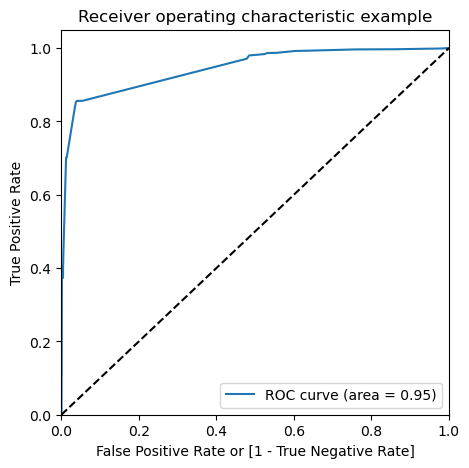

In [122]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [ ]:
## optimal cut off point

In [123]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.177127,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.177127,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.000602,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.773419,4750,1,1,1,1,1,1,1,1,1,0,0
4,1,0.975758,7987,1,1,1,1,1,1,1,1,1,1,1


In [124]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.671075  0.983647  0.475288
0.2   0.2  0.911038  0.856092  0.945455
0.3   0.3  0.920170  0.855683  0.960563
0.4   0.4  0.920170  0.855683  0.960563
0.5   0.5  0.920170  0.855683  0.960563
0.6   0.6  0.920170  0.855683  0.960563
0.7   0.7  0.920013  0.851594  0.962868
0.8   0.8  0.876712  0.701962  0.986172
0.9   0.9  0.777358  0.429681  0.995134


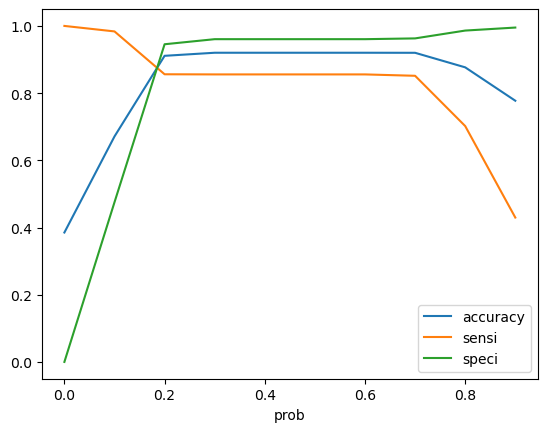

In [125]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [ ]:
## for subjective questions

In [116]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [117]:
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances.head(3))

                                      Feature  Importance
3                 Total Time Spent on Website    0.111711
63                      Lead Quality_Not Sure    0.066754
137  Tags_Will revert after reading the email    0.055386


In [118]:
dummy_features = [col for col in X_train.columns if '_' in col]
print("Dummy Features:", dummy_features[:10]) 

Dummy Features: ['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat', 'Lead Source_Organic Search', 'Lead Source_Others', 'Lead Source_Reference', 'Lead Source_Referral Sites']


In [119]:
dummy_importance_df = feature_importances[feature_importances['Feature'].isin(dummy_features)]
top_dummy_importance = dummy_importance_df.sort_values(by='Importance', ascending=False).head(3)

print("Top 3 Categorical/Dummy Variables in Random Forest:")
print(top_dummy_importance)

Top 3 Categorical/Dummy Variables in Random Forest:
                                      Feature  Importance
63                      Lead Quality_Not Sure    0.066754
137  Tags_Will revert after reading the email    0.055386
57   Tags_Will revert after reading the email    0.054265
